In [1]:
#import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
#read data set
df1 = pd.read_excel("AmazingMartEU2.xlsx",sheet_name=0)
df1.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England
4,AZ-2011-617423,2011-01-05,Daniel Burke,Echirolles,France,Central,Home Office,2011-01-07,Priority,Auvergne-Rhône-Alpes


In [3]:
df2 = pd.read_excel("AmazingMartEU2.xlsx",sheet_name=1)
df2.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [4]:
df3 = pd.read_excel("AmazingMartEU2.xlsx",sheet_name=2)
df3.head()

,Month of Order Date,Category,Target
0,2011-01-01,Furniture,10000
1,2011-02-01,Furniture,10100
2,2011-03-01,Furniture,10300
3,2011-04-01,Furniture,10400
4,2011-05-01,Furniture,10500


In [5]:
df3.rename(columns={"Month of Order Date":'Order Date'},inplace=True)

In [6]:
# • Check total number of rows and columns in the dataset
print("total number of rows and columns in sheet 1",df1.shape)
print("total number of rows and columns in sheet 2",df2.shape)
print("total number of rows and columns in sheet 3",df3.shape)

total number of rows and columns in sheet 1 (4117, 10)
total number of rows and columns in sheet 2 (8047, 8)
total number of rows and columns in sheet 3 (144, 3)


In [7]:
merge_df = pd.merge(df1,df2,on='Order ID',how = "inner")

In [8]:
merge_df.shape

(8047, 17)

### 2 check if all data type are appearing correctly or not

In [9]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   City           8047 non-null   object        
 4   Country        8047 non-null   object        
 5   Region         8047 non-null   object        
 6   Segment        8047 non-null   object        
 7   Ship Date      8047 non-null   datetime64[ns]
 8   Ship Mode      8047 non-null   object        
 9   State          8047 non-null   object        
 10  Product Name   8047 non-null   object        
 11  Discount       8047 non-null   float64       
 12  Sales          8047 non-null   int64         
 13  Profit         8047 non-null   int64         
 14  Quantity       8047 non-null   int64         
 15  Category       8047 n

### 3  Describe the data

In [10]:
merge_df.describe()

,Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000
mean,0.110047,291.845657,35.198211,3.772089
std,0.181773,485.212156,178.125844,2.203369
min,0.000000,3.000000,-3060.000000,1.000000
25%,0.000000,48.000000,1.000000,2.000000
50%,0.000000,117.000000,14.000000,3.000000
75%,0.100000,313.000000,47.000000,5.000000
max,0.850000,6517.000000,2476.000000,14.000000


### 4• Check if any column has null values

In [11]:
merge_df.isnull().sum()
# no null value presented 

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Category         0
Sub-Category     0
dtype: int64

### 5• Check if any column has NaN values

In [12]:
merge_df.isna().sum()

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Category         0
Sub-Category     0
dtype: int64

In [13]:
merge_df.nunique()

Order ID         4117
Order Date       1214
Customer Name     792
City              999
Country            15
Region              3
Segment             3
Ship Date        1311
Ship Mode           4
State             127
Product Name     1810
Discount           14
Sales            1248
Profit            845
Quantity           14
Category            3
Sub-Category       17
dtype: int64

### 6• Check if any column has inf values
df.isin('Order ID')

In [ ]:
a= -np.inf
print(a)

### 7• Check in any column has meaningless special characters


In [15]:
import re

In [16]:
merge_df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Product Name',
       'Discount', 'Sales', 'Profit', 'Quantity', 'Category', 'Sub-Category'],
      dtype='object')

In [17]:
check_pattern = re.compile(r"[^a-zA-Z0-9\s]")


In [18]:
def contain_special_character(value):
    return bool(check_pattern.search(str(value)))

In [19]:
def column_check(column_name):
    return merge_df[column_name].apply(contain_special_character).sum()

In [20]:
for column in merge_df.columns:
    print(column, ":", column_check(column))

Order ID : 8047
Order Date : 8047
Customer Name : 99
City : 523
Country : 0
Region : 0
Segment : 0
Ship Date : 8047
Ship Mode : 0
State : 2957
Product Name : 8047
Discount : 8047
Sales : 0
Profit : 1734
Quantity : 0
Category : 0
Sub-Category : 0


### 8• Check if any row is a duplicate

In [21]:
merge_df.duplicated().sum()

2

In [22]:
merge_df.drop_duplicates(inplace=True)

In [23]:
merge_df.duplicated().sum()

0

### 9• Separate categorical and numerical columns

In [24]:
cat = merge_df.select_dtypes(include=['object','category'])
num = merge_df.select_dtypes(include=['int64'])

In [25]:
cat.columns

Index(['Order ID', 'Customer Name', 'City', 'Country', 'Region', 'Segment',
       'Ship Mode', 'State', 'Product Name', 'Category', 'Sub-Category'],
      dtype='object')

In [26]:
num.columns

Index(['Sales', 'Profit', 'Quantity'], dtype='object')

In [27]:
from tabulate import tabulate
table = [cat,num]
print(tabulate({"categorical":cat,
               "numerical":num},headers = ['Categorical','numerical']))

Categorical    numerical
-------------  -----------
Order ID       Sales
Customer Name  Profit
City           Quantity
Country
Region
Segment
Ship Mode
State
Product Name
Category
Sub-Category


### 10• Check if the numerical columns have outliers


In [28]:
num.describe()

,Sales,Profit,Quantity
count,8045.000000,8045.000000,8045.000000
mean,291.903170,35.202237,3.772281
std,485.258616,178.147747,2.203610
min,3.000000,-3060.000000,1.000000
25%,48.000000,1.000000,2.000000
50%,117.000000,14.000000,3.000000
75%,313.000000,47.000000,5.000000
max,6517.000000,2476.000000,14.000000


C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

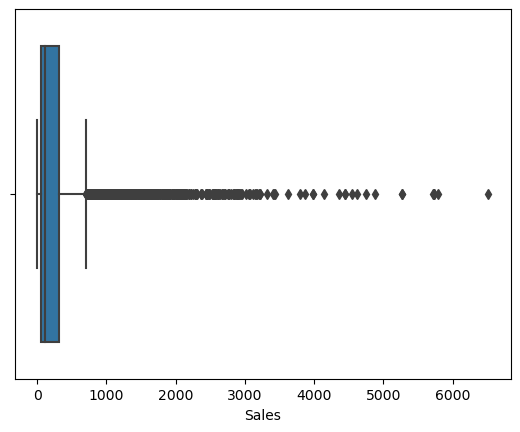

In [29]:
sb.boxplot(num['Sales'])

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

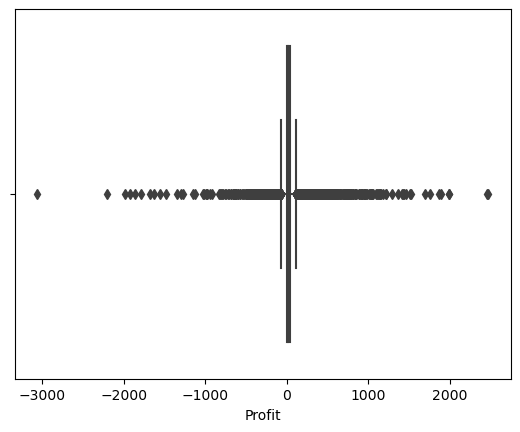

In [30]:
sb.boxplot(num['Profit'])

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

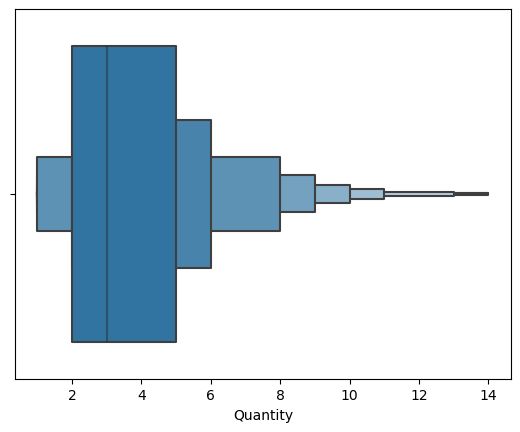

In [31]:
sb.boxenplot (num['Quantity'])

### 11.Fill or delete the missing values as required

In [32]:
merge_df.isnull().sum()
# no missing value

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Category         0
Sub-Category     0
dtype: int64

### 12• Clean the columns which have meaningless special characters (for example  might be written in the data unnecessarily, remove # if it is not required)

In [33]:
check_pattern

re.compile(r'[^a-zA-Z0-9\s]', re.UNICODE)

In [34]:
for column in merge_df.columns:
    print(column, ":", column_check(column))

Order ID : 8045
Order Date : 8045
Customer Name : 99
City : 523
Country : 0
Region : 0
Segment : 0
Ship Date : 8045
Ship Mode : 0
State : 2957
Product Name : 8045
Discount : 8045
Sales : 0
Profit : 1734
Quantity : 0
Category : 0
Sub-Category : 0


In [35]:
def clean_spl_char(value):
     return re.sub(check_pattern, '', str(value))

In [36]:
final_df = merge_df.copy()

In [37]:
merge_df['Customer Name']=merge_df['Customer Name'].apply(clean_spl_char)
merge_df['City']=merge_df['City'].apply(clean_spl_char)
merge_df['State']=merge_df['State'].apply(clean_spl_char)
merge_df['Product Name']=merge_df['Product Name'].apply(clean_spl_char)
merge_df['Discount']=merge_df['Discount'].apply(clean_spl_char).astype(int)
merge_df['Profit']=merge_df['Profit'].apply(clean_spl_char).astype(int)

In [38]:
for column in merge_df.columns:
    print(column, ":", column_check(column))

Order ID : 8045
Order Date : 8045
Customer Name : 0
City : 0
Country : 0
Region : 0
Segment : 0
Ship Date : 8045
Ship Mode : 0
State : 0
Product Name : 0
Discount : 0
Sales : 0
Profit : 0
Quantity : 0
Category : 0
Sub-Category : 0


### 13• Treat the outliers if required

In [39]:
num.columns

Index(['Sales', 'Profit', 'Quantity'], dtype='object')

In [40]:
def clean_outlayer(txt):
    Q1=txt.quantile(0.25)
    Q3=txt.quantile(0.75)
    IQR = Q3-Q1
    global LF,UF
    LF = Q1- 1.5 *IQR 
    UF = Q3+ 1.5 *IQR 
    Median = txt.median()
    return txt.apply(lambda x:Median if x<LF or x>UF else x)
# Keep uf lf as global variable so they can use as function also 
# after the treatment of outlayers 
# use np.where to check if any row has values greater than uf and less than lf 


In [41]:
df_clean = num.copy()

In [42]:
df_clean.apply(clean_outlayer)

,Sales,Profit,Quantity
0,45.0,-26.0,3.0
1,117.0,14.0,7.0
2,140.0,21.0,3.0
3,27.0,-22.0,2.0
4,17.0,-1.0,2.0
...,...,...,...
8042,289.0,75.0,5.0
8043,32.0,8.0,5.0
8044,30.0,-10.0,2.0
8045,23.0,-6.0,4.0


In [47]:
num

,Sales,Profit,Quantity
0,45,-26,3
1,854,290,7
2,140,21,3
3,27,-22,2
4,17,-1,2
...,...,...,...
8042,289,75,5
8043,32,8,5
8044,30,-10,2
8045,23,-6,4


### 14• Finalize the most important column in the dataset. We can refer to the most crucial column as the Target column.

In [48]:
# Here i took Profit as the target column which is numerical column

### 15• Display distribution of all numerical columns

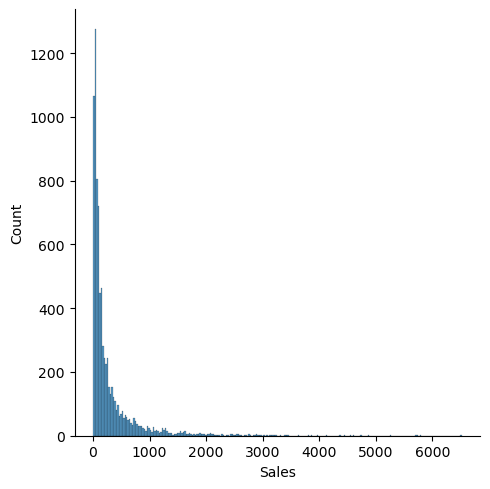

In [49]:
sb.displot(df_clean['Sales'])

<AxesSubplot:xlabel='Profit', ylabel='Count'>

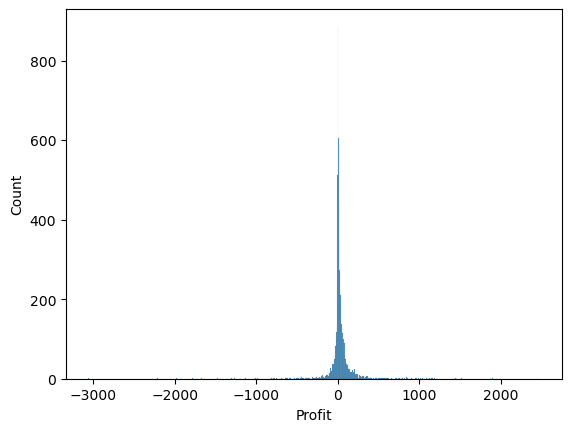

In [50]:
sb.histplot(df_clean['Profit'])

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

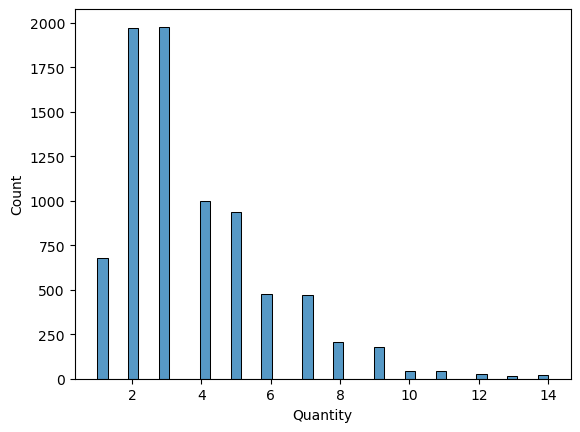

In [51]:
sb.histplot(df_clean['Quantity'])

### 16• Display the ratio of unique values in all categorical columns

In [52]:
merge_df.nunique()

Order ID         4117
Order Date       1214
Customer Name     792
City              999
Country            15
Region              3
Segment             3
Ship Date        1311
Ship Mode           4
State             127
Product Name     1810
Discount           14
Sales            1248
Profit            582
Quantity           14
Category            3
Sub-Category       17
dtype: int64

In [53]:
cat.nunique()

Order ID         4117
Customer Name     792
City              999
Country            15
Region              3
Segment             3
Ship Mode           4
State             127
Product Name     1810
Category            3
Sub-Category       17
dtype: int64

In [54]:
lable = list(cat['Country'].unique())
lable

['Sweden',
 'United Kingdom',
 'France',
 'Italy',
 'Austria',
 'Spain',
 'Germany',
 'Netherlands',
 'Denmark',
 'Belgium',
 'Norway',
 'Portugal',
 'Switzerland',
 'Ireland',
 'Finland']

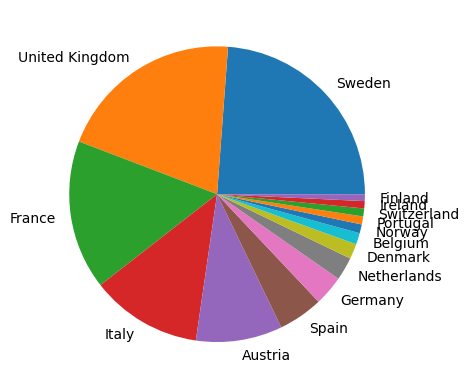

In [55]:
plt.pie(cat['Country'].value_counts(),labels=lable);

### 17• Find insights from univariate analysis - Apart from the most import column, find out which other columns are critical for our analysis

## User defined functions for level 1 analysis of categorical columns
This function will check for the following:

* unique values
* mode
* sum of all the null values
* Total count of missing values

In [56]:
cat.columns

Index(['Order ID', 'Customer Name', 'City', 'Country', 'Region', 'Segment',
       'Ship Mode', 'State', 'Product Name', 'Category', 'Sub-Category'],
      dtype='object')

In [57]:
num.columns

Index(['Sales', 'Profit', 'Quantity'], dtype='object')

In [58]:
def info(col):
    print(f"Unique value in {col} are :{cat[col].nunique()}")
    print(f"Mode of col is {col} is : {cat[col].mode()[0]}")
    print(f"Total num of missing value in {col} is: {cat[col].isnull().sum()}")

In [59]:
info('City')

Unique value in City are :999
Mode of col is City is : London
Total num of missing value in City is: 0


<AxesSubplot:xlabel='City', ylabel='count'>

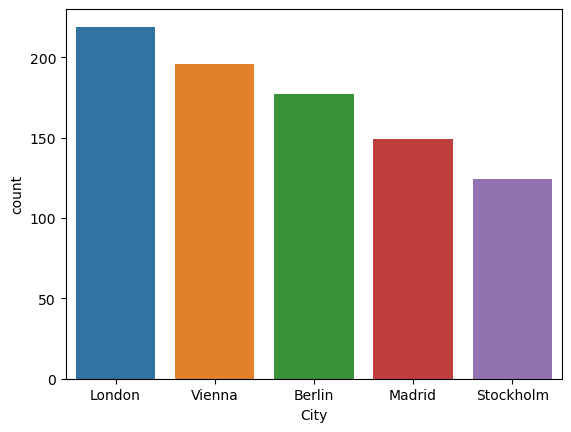

In [60]:
top_city = list(cat['City'].value_counts().head().index)
sb.countplot(x='City', data=cat[cat['City'].isin(top_city)], order=top_city)

In [61]:
info('Country')

Unique value in Country are :15
Mode of col is Country is : France
Total num of missing value in Country is: 0


In [62]:
info('Region')

Unique value in Region are :3
Mode of col is Region is : Central
Total num of missing value in Region is: 0


In [63]:
info('Segment')

Unique value in Segment are :3
Mode of col is Segment is : Consumer
Total num of missing value in Segment is: 0


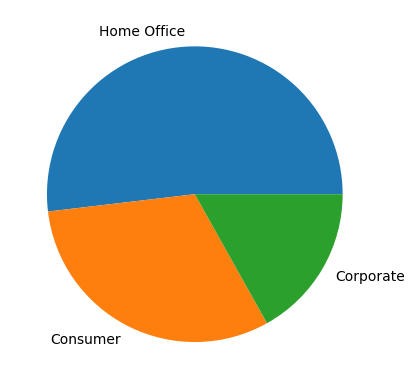

In [64]:
plt.pie(cat['Segment'].value_counts(),labels=cat['Segment'].unique());

In [65]:
info('Ship Mode')

Unique value in Ship Mode are :4
Mode of col is Ship Mode is : Economy
Total num of missing value in Ship Mode is: 0


In [66]:
info('State')

Unique value in State are :127
Mode of col is State is : England
Total num of missing value in State is: 0


In [67]:
info('Category')

Unique value in Category are :3
Mode of col is Category is : Office Supplies
Total num of missing value in Category is: 0


In [68]:
info('Sub-Category')

Unique value in Sub-Category are :17
Mode of col is Sub-Category is : Art
Total num of missing value in Sub-Category is: 0


### 18• Perform bivariate analysis on Target column with respect to all other columns.

In [69]:
merge_df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Product Name',
       'Discount', 'Sales', 'Profit', 'Quantity', 'Category', 'Sub-Category'],
      dtype='object')

In [70]:
# Here i took Profit as target column

In [71]:
merge_df['Profit'].dtype

dtype('int32')

<AxesSubplot:xlabel='Profit', ylabel='Country'>

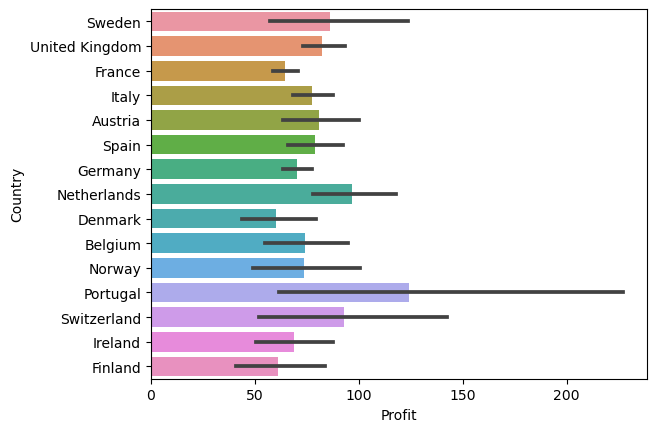

In [72]:
sb.barplot(x='Profit',y='Country',data =merge_df)

In [73]:
# Portugal has more profit than other country

<AxesSubplot:xlabel='Region', ylabel='Profit'>

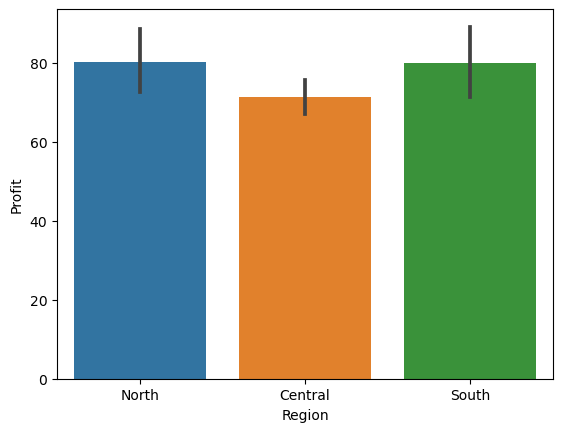

In [74]:
sb.barplot(x='Region',y='Profit',data = merge_df)

In [75]:
# Central region has lesser profit than other region

<AxesSubplot:xlabel='Profit', ylabel='Segment'>

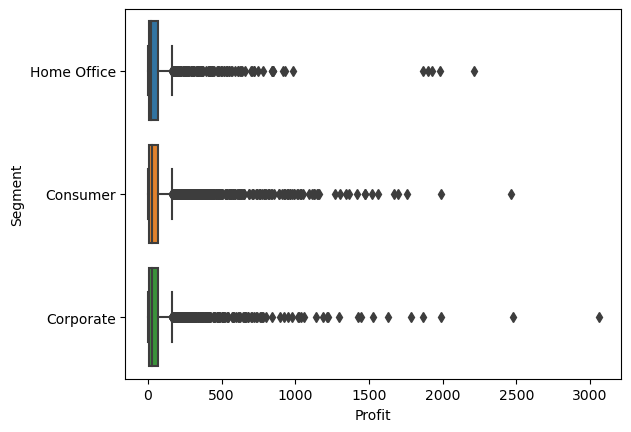

In [76]:
sb.boxplot(y='Segment',x='Profit',data=merge_df)

In [77]:
info('State')

Unique value in State are :127
Mode of col is State is : England
Total num of missing value in State is: 0


<AxesSubplot:xlabel='Profit', ylabel='Discount'>

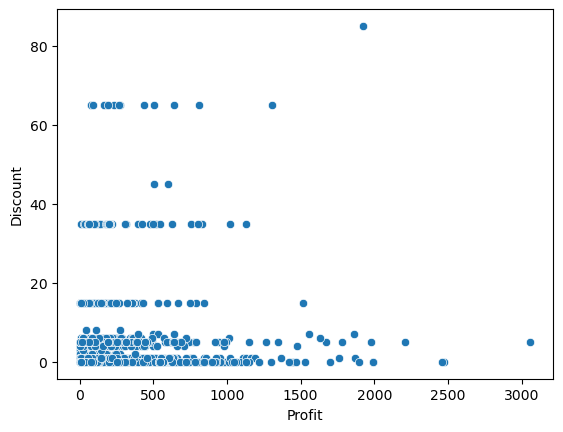

In [78]:
sb.scatterplot(x='Profit',y='Discount',data=merge_df)

In [79]:
# with lesser discount has more profit than higher discount

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

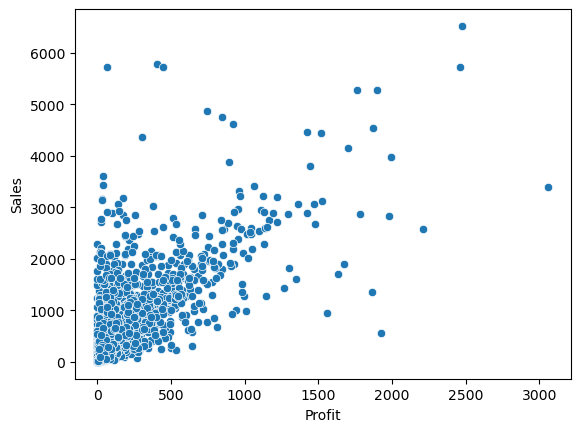

In [80]:
sb.scatterplot(x='Profit',y='Sales',data=merge_df)

In [81]:
# from this chart we observe more the sale more the profit is

<AxesSubplot:xlabel='Profit', ylabel='Quantity'>

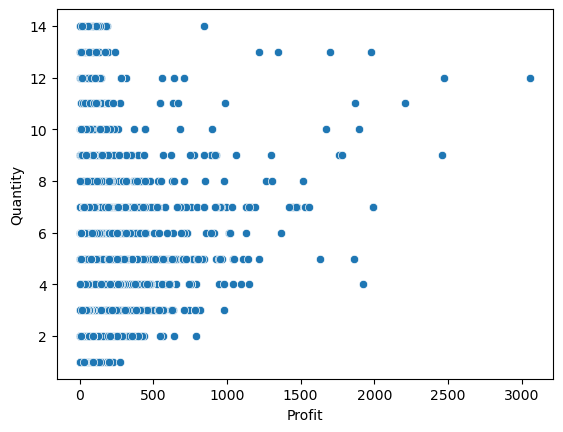

In [82]:
sb.scatterplot(x='Profit',y='Quantity',data = merge_df)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

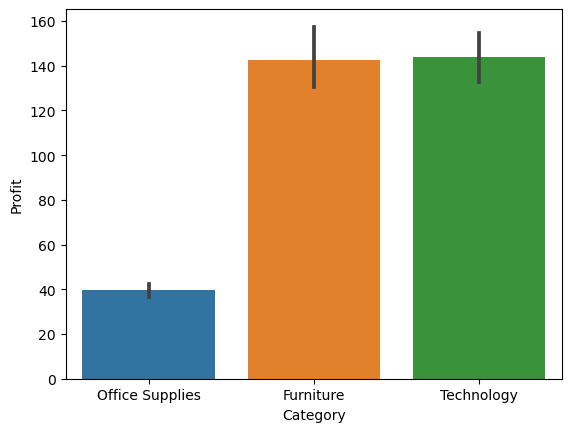

In [83]:
sb.barplot(x='Category',y='Profit',data=merge_df)

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

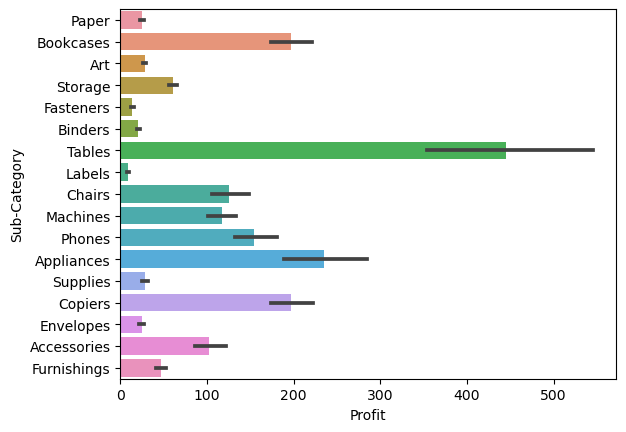

In [84]:
sb.barplot(x='Profit',y='Sub-Category',data=merge_df)

In [85]:
# Tables sub category has more profit than other Category

### 19• Find insights from bivariate analysis and finalise which critical columns can be further investigated for multivariate analysis

<AxesSubplot:>

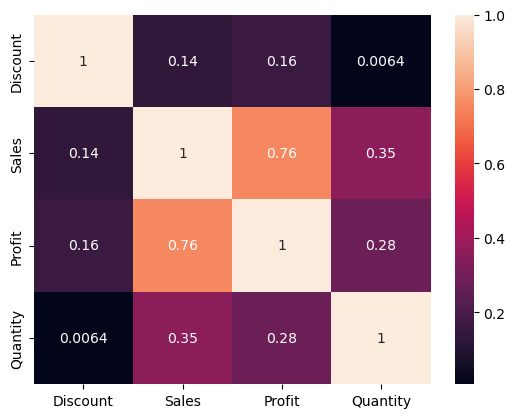

In [86]:
sb.heatmap(merge_df.corr(),annot=True)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

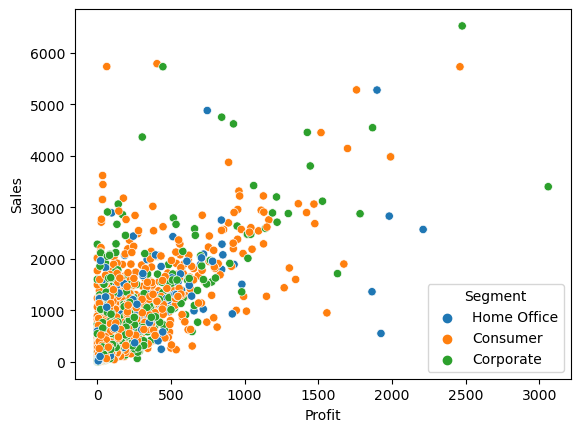

In [87]:
sb.scatterplot(x='Profit',y='Sales',data=merge_df,hue='Segment')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

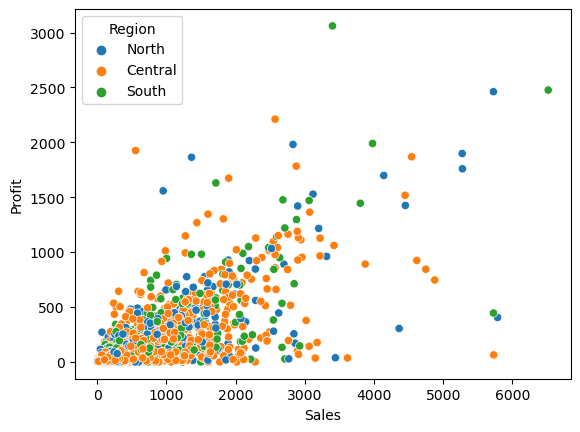

In [88]:
sb.scatterplot(x='Sales',y='Profit',data=merge_df,hue='Region')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

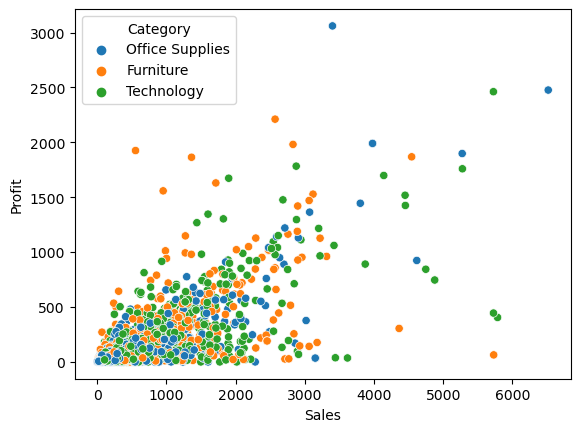

In [89]:
sb.scatterplot(x='Sales',y='Profit',data=merge_df,hue='Category')